In [1]:
from src import attributes as a
%load_ext autoreload
%autoreload 2

In [2]:
# Global Variables
stock_name = 'ma' # ticker symbol
train = 0 # 1 for train, 0 for pass
days_ahead = 1 # for predicting 1, 3, or 5 days ahead
days_back = -1 # -1 for current data point, -2 for two days ago, etc...
cv = 5 # number of cross validation folds
model_name = 'Random Forest Classifier' # for display on charts, not a tuning parameter

In [3]:
# Extract, Transform, Load, and Train Test Split
# Dictionary of IPO Dates
start_dates = {'a': '11/15/1999'# Updated 1/5/21 1D, 3D, 5D ahead
               , 'aapl':'12/12/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'acy': '01/18/1998' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'adbe': '08/11/1986' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'amd': '03/17/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'baba': '09/15/2014' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'bac': '02/19/1973' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'crm': '06/23/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'esgv': '09/16/2018' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'goog': '08/16/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'ibm': '01/02/1962' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'idex': '05/23/2007' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'intc': '03/16/1980' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'iyw': '05/15/2000' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'ma': '05/21/2006' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'msft': '03/10/1986' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'nio': '09/10/2018' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'nvda': '01/22/1999' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'pypl': '07/05/2015' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'tsla': '06/29/2010' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'v': '03/16/2008' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vbiv': '09/04/2002' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vbr': '01/26/2004' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'viov': '09/06/2010' # Updated 1/5/21 1D, 3D, 5D ahead
               , 'vgt': '01/26/2004' # Updated 1/5/21 1D, 3D, 5D ahead
              }

In [4]:
X_train, X_test, y_train, y_test, stock_df = a.data(stock_name, start_dates[stock_name], days_ahead)
stock_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction
Date,,,,,,,,,,,,
2020-12-21,336.149994,327.239990,333.209991,334.369995,3642500.0,334.369995,-0.003481,0.027228,-0.017512,0.013016,0.002005,1
2020-12-22,335.220001,331.600006,334.160004,332.239990,2403100.0,332.239990,0.005746,0.010917,-0.006370,0.013023,-0.000779,-1
2020-12-23,335.209991,329.029999,334.130005,329.230011,2760600.0,329.230011,0.014665,0.018782,-0.009060,0.013492,-0.001662,1
2020-12-24,336.369995,330.350006,330.649994,336.000000,1308900.0,336.000000,-0.016180,0.018223,0.020563,0.015450,-0.000440,1
2020-12-28,345.589996,336.869995,337.859985,344.470001,3449100.0,344.470001,-0.019564,0.025885,0.025208,0.019070,0.002566,-1
2020-12-29,348.750000,344.760010,347.779999,346.660004,2822700.0,346.660004,0.003220,0.011573,0.006358,0.015427,0.007340,1
2020-12-30,357.820007,347.209991,348.679993,355.549988,4200600.0,355.549988,-0.019703,0.030558,0.025645,0.014951,0.013743,-1
2020-12-31,359.410004,353.250000,355.029999,356.940002,2881700.0,356.940002,-0.005380,0.017438,0.003909,0.010455,0.016337,-1
2021-01-04,358.130005,347.359985,358.000000,351.489990,4637500.0,351.489990,0.018184,0.031005,-0.015269,0.017040,0.009170,1


In [5]:
# GridSerach to find best hyperparameters to prevent overfitting, can be commented out once trained
if train == 1:
    a.rfc_GridSearch(X_train, y_train, stock_name, days_ahead, cv)
elif train == 0:
    pass

In [6]:
# Load RandomForextClassifier Model
rfc_model, y_pred, y_probs = a.rfc(X_train, X_test, y_train, stock_name, days_ahead)

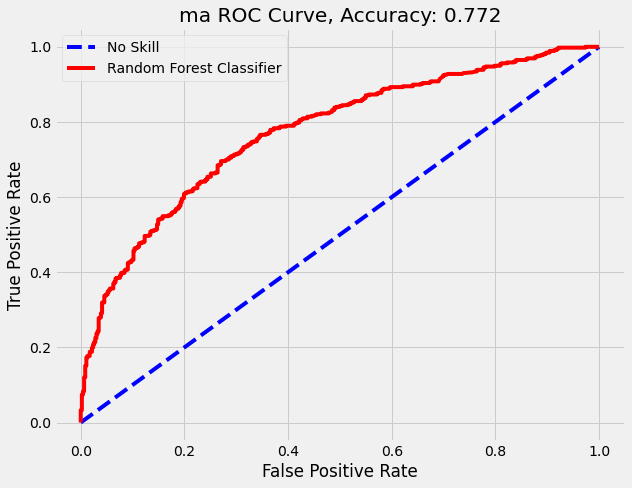

In [7]:
# ROC Curve
a.roc_plot(y_test, y_probs, stock_name, model_name)

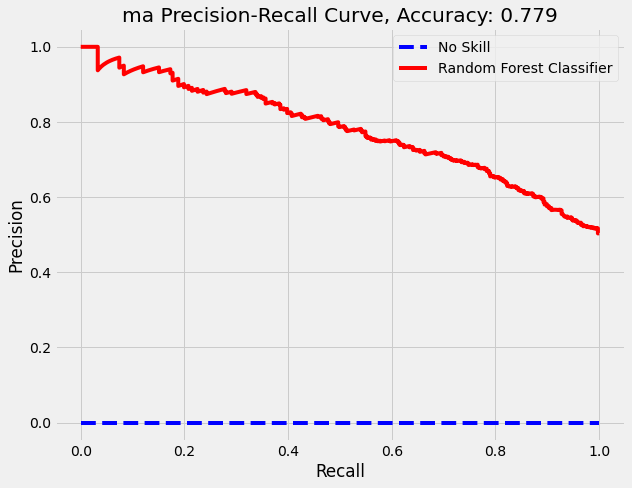

In [8]:
# Precision Recall Curve
a.prec_recall(y_test, y_probs, stock_name, model_name)

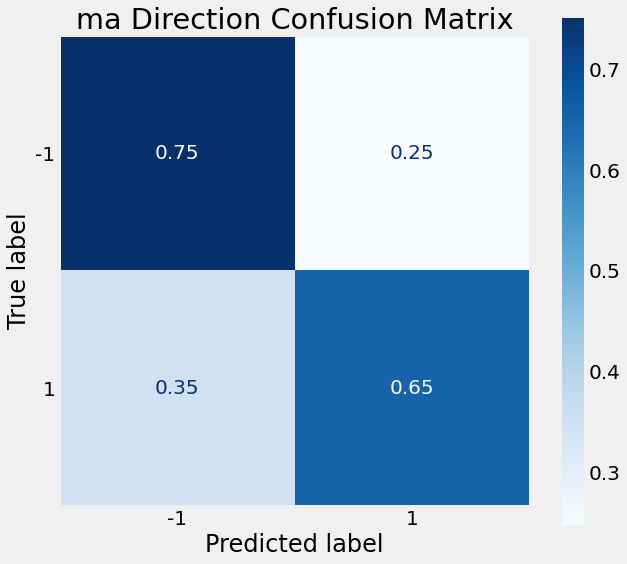

In [9]:
# Confusion Matrix
a.confusion_matrix(rfc_model, X_test, y_test, stock_name)

In [10]:
# Cross Validation
a.cross_validation(rfc_model
                   , stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']]
                   , stock_df['direction']
                   , cv = 5
                  )

'5 Fold Cross-Validation Score for First RF Model: 0.7163876994939665'

### Prediction...

In [11]:
# Prediction, use last day of data
stock_df.iloc[-1]

High          3.530000e+02
Low           3.454371e+02
Open          3.488000e+02
Close         3.474200e+02
Volume        2.796672e+06
Adj Close     3.474200e+02
oc            3.956349e-03
hl            2.189370e-02
adj          -1.157921e-02
5stdev_adj    1.631053e-02
5sma_adj      1.812767e-03
direction    -1.000000e+00
Name: 2021-01-05 00:00:00, dtype: float64

In [12]:
import numpy as np
last = stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']].iloc[-days_back]
last

oc           -0.044633
hl            0.047872
5stdev_adj    0.034143
5sma_adj      0.018575
Name: 2006-06-05 00:00:00, dtype: float64

In [13]:
stock_df['adj'].describe()

count    3674.000000
mean        0.001427
std         0.021935
min        -0.127255
25%        -0.008180
50%         0.001439
75%         0.010219
max         0.208463
Name: adj, dtype: float64

In [14]:
if rfc_model.predict(np.array(last).reshape(1, -1))[0] == 1:
    print(f'Buy {stock_name} {days_ahead} day(s) ahead')
else:
    print(f'Sell or hold {stock_name} {days_ahead} day(s) ahead')

Sell or hold ma 1 day(s) ahead


### Strategy Returns...

In [15]:
# returns on strategy column
stock_df['prediction'] = rfc_model.predict(stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']])
stock_df['returns'] = stock_df['adj'].shift(-1, fill_value = stock_df['adj'].median()) * stock_df['prediction']

In [16]:
stock_df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction,prediction,returns
Date,,,,,,,,,,,,,,
2020-12-29,348.750000,344.760010,347.779999,346.660004,2822700.0,346.660004,0.003220,0.011573,0.006358,0.015427,0.007340,1,1,0.025645
2020-12-30,357.820007,347.209991,348.679993,355.549988,4200600.0,355.549988,-0.019703,0.030558,0.025645,0.014951,0.013743,-1,-1,-0.003909
2020-12-31,359.410004,353.250000,355.029999,356.940002,2881700.0,356.940002,-0.005380,0.017438,0.003909,0.010455,0.016337,-1,-1,0.015269
2021-01-04,358.130005,347.359985,358.000000,351.489990,4637500.0,351.489990,0.018184,0.031005,-0.015269,0.017040,0.009170,1,1,-0.011579
2021-01-05,353.000000,345.437103,348.799988,347.420013,2796672.0,347.420013,0.003956,0.021894,-0.011579,0.016311,0.001813,-1,1,0.001439


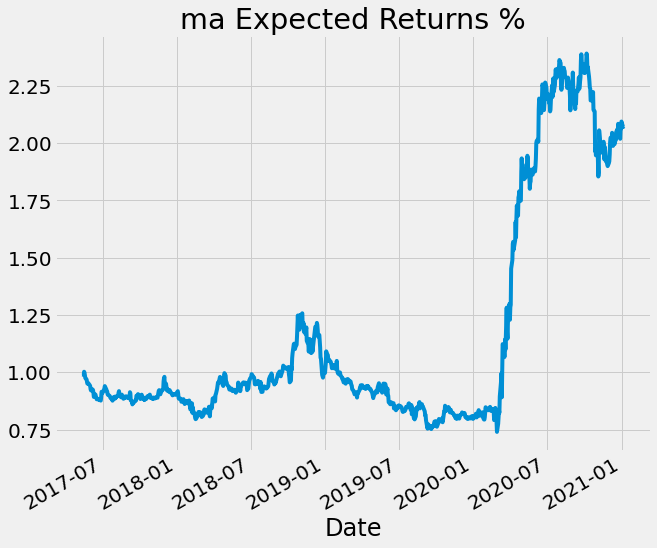

In [17]:
# Don't trade every day!
import matplotlib.pyplot as plt
test_length = len(y_test)
(stock_df['returns'][-test_length:] + 1).cumprod().plot()
plt.title(f'{stock_name} Expected Returns %');

In [18]:
# Model returns if bought on predictions of 1
returns_on_ones = []
for idx in range(-test_length, 0):
    if stock_df['prediction'][idx] == 1:
        returns_on_ones.append(1 + stock_df['returns'][idx])

returns = 1
for x in returns_on_ones:
    returns *= x
returns

2.721407255137063

In [19]:
# multiple times original investment, not bad but...

In [20]:
# If purchased in 2012 and left it until now
test_idx = int(len(stock_df)*0.75)
(stock_df['Close'][-1] - stock_df['Close'][-test_idx]) / stock_df['Close'][-test_idx]

12.55362311421159

In [21]:
# Buy and hold strategy beats RandomForestClassifier in this study

# Special thanks to Shagufta Tahsildar at https://blog.quantinsti.com/random-forest-algorithm-in-python/

### Training

In [22]:
# this takes a while, 10.5+ hours!
# stocks = [x for x in start_dates]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

### Recording Results